# COMP5329 - Deep Learning

## Tutorial 2 - Unsupervised Feature Learning

**Semester 1, 2018**

**Objectives:**

* To understand principal component analysis (PCA).
* To understand the algorithm of canonical correlation analysis (CCA).
* To learn about applications of dictionary learning and sparse coding. (Optional)
* To understand the algorithm of matrix factorization (MF). (Optional)


**Instructions:**

* Fill in the four blanks in the programs of the first two parts. (Marked with To do here (*))
* The last two parts and exercises are optinal.
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Restart the kernel for each part.

**Install related packages:**

All python libraries needed in this ipython notebook (e.g. Scikit-learn) are available within Anaconda.

Or, you could install these manually through pip or pip3:
* pip install numpy
* pip install scipy
* pip install matplotlib
* pip install seaborn
* pip install -U scikit-learn

Lecturers: Chang Xu

Tutors: Dalu Guo, Jiayan Qiu, Chaoyue Wang, Xinyuan Chen, Zeyu Feng and Sanjeev Sharma.

## 1. Principal Component Analysis (PCA)

PCA is fundamentally a dimensionality reduction algorithm.
For $N$ samples $\mathbf{X} = (\mathbf{x}^{(1)},...,\mathbf{x}^{(N)})$ with each sample $\mathbf{x}^{(i)} \in \mathbb{R}^p$, in PCA we actually only need to find the eigenvectors of the scatter matrix of $\mathbf{X}$:
\begin{equation}
\mathbf{\Sigma} = \frac{1}{N}\sum_{i=1}^{N}(\mathbf{x}^{(i)}-\bar{\mathbf{x}})(\mathbf{x}^{(i)}-\bar{\mathbf{x}})^T
\end{equation}
where $\bar{\mathbf{x}} = \frac{1}{N}\sum_{i=1}^{N} \mathbf{x}^{(i)}$ is the sample mean vector. The eigenvectors in columns could form the matrix $\mathbf{U} = (\mathbf{u}^{(1)},...,\mathbf{u}^{(p)})$. 

The following description and exercises should give you a better intuition for what PCA is actually doing.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

Its behavior is easiest to visualize by looking at a two-dimensional dataset. Consider the following 200 points:

(-2.6381236284803178,
 2.4760122499900525,
 -2.5967273652266019,
 2.5713718640088414)

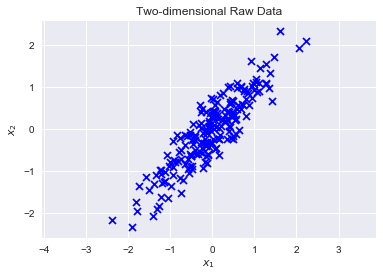

In [2]:
n_samples = 200
# Generate the sample
rng = np.random.RandomState(7)
data_raw = np.dot(rng.rand(2, 2), rng.randn(2, n_samples))

plt.scatter(data_raw[0,:], data_raw[1,:], marker='x', color='b')
plt.title('Two-dimensional Raw Data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')

In order for PCA to work well, informally we require that
* The features have approximately zero mean.
* The different features have similar variances to each other.

In fact, PCA is invariant to the scaling of the data. If you multiply each feature vector $\mathbf{x}$ by some positive number (thus scaling every feature in every training example by the same number), PCA’s output eigenvectors will not change.

The only normalization we need to perform then is mean normalization. In this example, each of the features $x_1$ and $x_2$ should have same mean (zero).

In [3]:
data_norm = data_raw - data_raw.mean(axis=1).reshape([2,1])

# Compute the Scatter Matrix
Sigma = data_norm.dot(data_norm.T)/n_samples
print(Sigma)

[[ 0.58436805  0.57053686]
 [ 0.57053686  0.68866686]]


Eigen decomposition: compute eigenvectors and corresponding eigenvalues:

In [4]:
lamda, U = np.linalg.eig(Sigma) # eigen values, eigen vectors
print('lamda=\n',lamda)
print('U=\n',U)

lamda=
 [ 0.06360221  1.20943269]
U=
 [[-0.73858806 -0.67415701]
 [ 0.67415701 -0.73858806]]


Note that the `eig` function does not return ordered eigenvalues, thus we must sort the eigenvectors by decreasing eigenvalues.

In [5]:
# Make a list of (eigen value, eigen vector) tuples
eig_pairs = [(np.abs(lamda[i]), U[:,i]) for i in range(len(lamda))]

# Sort the (eigen value, eigen vector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# create new eigen vector
lamda_sort_abs = np.zeros(len(lamda))
U_sort = np.zeros([len(lamda),len(lamda)])
for i in range(len(lamda)):
    lamda_sort_abs[i] = eig_pairs[i][0]
    U_sort[:,i] = eig_pairs[i][1]
print(U_sort)

[[-0.67415701 -0.73858806]
 [-0.73858806  0.67415701]]


Transform the data and plot it using the eigenvectors as the principal axes.
\begin{equation}
\mathbf{X}_{rot} = \mathbf{U}^T \mathbf{\tilde{X}}
\end{equation}
where $\mathbf{\tilde{X}}$ is normalized data.

(-3.453035151377879,
 3.4694504374801785,
 -0.67472859089581605,
 0.66661126179767016)

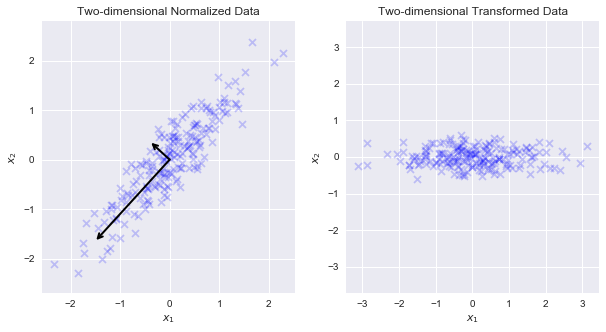

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.scatter(data_norm[0,:], data_norm[1,:], marker='x', color='b', alpha=0.2)
origin = np.zeros([len(lamda)])
for i in range(len(lamda)):
    direction = U[:,i] * np.sqrt(np.abs(lamda[i])) * 2
    draw_vector(origin, origin + direction)
plt.title('Two-dimensional Normalized Data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')

plt.subplot(122)
# Compute transformed data
# To do here (1)
data_trans = U_sort.T.dot(data_norm)
plt.scatter(data_trans[0,:], data_trans[1,:], marker='x', color='b', alpha=0.2)
plt.title('Two-dimensional Transformed Data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')

Reconstruct the original pattern using the first component. For each sample, the reconstructed data is $\hat{x}^{(i)} = \mathbf{u}^{(1)} x_{rot1}^{(i)}$.

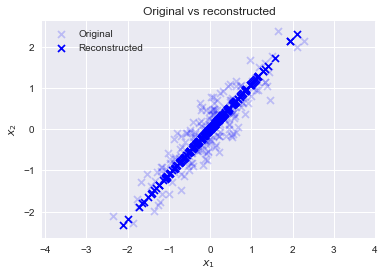

In [7]:
# Compute reconstructed data
# To do here (2)
data_first_component = U_sort[:,0].reshape([len(lamda),1]).dot(data_trans[0,:].reshape([1,n_samples]))

plt.title('Original vs reconstructed')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.scatter(data_norm[0,:], data_norm[1,:], marker='x', color='b', alpha=0.2, label='Original')
plt.scatter(data_first_component[0,:], data_first_component[1,:], marker='x', color='b', label='Reconstructed')
plt.legend()

## 2. Canonical Correlation Analysis (CCA)

In CCA, $\boldsymbol{X} = (X_1, ..., X_p)^T$ and $\boldsymbol{Y} = (Y_1, ..., Y_q)^T$ represent two random vectors. We aim to find new variables $\boldsymbol{U}$ and $\boldsymbol{V}$ via linear combination of $\boldsymbol{X}$ and $\boldsymbol{Y}$ that maximally correlate.
\begin{equation}
\boldsymbol{A} = \mathbf{U}^T \boldsymbol{X}
\end{equation}
\begin{equation}
\boldsymbol{B} = \mathbf{V}^T \boldsymbol{Y}
\end{equation}

In [1]:
import numpy as np

data = np.loadtxt("2-ufl-data-decathlon.txt")
data.shape

(33, 10)

In this example, data are from men’s 1988 Olympic decathlon. There are total of n = 33 athletes and 10 variables that give score for each decathlon event. Ten variables are run100, long.jump, shot, high.jump, run400, hurdle, discus, pole.vault, javelin, run1500. For the running events (run100, run400, run1500, and hurdle), lower scores correspond to better performance, whereas higher scores represent better performance for other events. we will resign the running events to make them comparable.

We will split the decathlon events into two different sets:
* $\boldsymbol{X}$: shot, discus, javelin, pole.vault
* $\boldsymbol{Y}$: run100, run400, run1500, hurdle, long.jump, high.jump
Note that X are “arm events” (throwing/vaulting), whereas Y are “leg events” (running/jumping).

In [2]:
data[:,(0,4,5,9)] *= -1
X = data[:,(2,6,8,7)]
Y = data[:,(0,4,9,5,1,3)]

After collecting $N$ samples, we first need to compute sample covariance matrix $\mathbf{S}_X,\mathbf{S}_Y,\mathbf{S}_{XY}$ and $\mathbf{S}_{YX}$. Their formulas are given by
\begin{equation}
\mathbf{S}_{X} = \frac{1}{N}\sum_{i=1}^{N}(\mathbf{x}_i-\bar{\mathbf{x}})(\mathbf{x}_i-\bar{\mathbf{x}})^T
\end{equation}
\begin{equation}
\mathbf{S}_{Y} = \frac{1}{N}\sum_{i=1}^{N}(\mathbf{y}_i-\bar{\mathbf{y}})(\mathbf{y}_i-\bar{\mathbf{y}})^T
\end{equation}
\begin{equation}
\mathbf{S}_{XY} = \mathbf{S}_{YX}^T = \frac{1}{N}\sum_{i=1}^{N}(\mathbf{x}_i-\bar{\mathbf{x}})(\mathbf{y}_i-\bar{\mathbf{y}})^T
\end{equation}
where $\bar{\mathbf{x}} = \frac{1}{N}\sum_{i=1}^{N} \mathbf{x}_i$ and $\bar{\mathbf{y}} = \frac{1}{N}\sum_{i=1}^{N} \mathbf{y}_i$ are the sample mean vector.


In [3]:
n_samples = len(data)
X -= X.mean(axis=0)
Y -= Y.mean(axis=0)
# Store each data point as column
X = X.T
Y = Y.T

S_X = 1/n_samples*np.dot(X,X.T)
S_Y = 1/n_samples*np.dot(Y,Y.T)
S_XY = 1/n_samples*np.dot(X,Y.T)
S_YX = S_XY.T

$\boldsymbol{A} = \mathbf{U}^T \boldsymbol{X}$ and $\boldsymbol{B} = \boldsymbol{V}^T \mathbf{Y}$ where $\mathbf{U} = [\mathbf{u}_1,...,\mathbf{u}_p]$ and $\mathbf{V} = [\mathbf{v}_1,...,\mathbf{v}_q]$

* $\boldsymbol{A} = (A_1, ...,A_p)^T$ contains the $p$ canonical variates from $\boldsymbol{X}$
* $\boldsymbol{B} = (B_1, ...,B_p)^T$ contains the $q$ canonical variates from $\boldsymbol{Y}$
* if $p \leq q$, we are interested in first $p$ canonical variates from $\boldsymbol{Y}$

The $k$-th pair of canonical coefficients are $\mathbf{u}_k$ and $\mathbf{v}_k$. They are given by
\begin{equation}
\mathbf{u}_k = (\mathbf{S}_{X}^{-\frac{1}{2}})^T \mathbf{w}_{uk}
\end{equation}
\begin{equation}
\mathbf{v}_k = (\mathbf{S}_{Y}^{-\frac{1}{2}})^T \mathbf{w}_{vk}
\end{equation}
Simply, we can directly calculate the eigen decomposition
* $\mathbf{w}_{uk}$ is the $k$-th eigenvector of $\mathbf{S}_{X}^{-\frac{1}{2}} \mathbf{S}_{XY} \mathbf{S}_{Y}^{-1} \mathbf{S}_{YX} \mathbf{S}_{X}^{-\frac{1}{2}}$
* $\mathbf{w}_{vk}$ is the $k$-th eigenvector of $\mathbf{S}_{Y}^{-\frac{1}{2}} \mathbf{S}_{YX} \mathbf{S}_{X}^{-1} \mathbf{S}_{XY} \mathbf{S}_{Y}^{-\frac{1}{2}}$

In [4]:
from scipy.linalg import fractional_matrix_power as fmp
from functools import reduce
# Compute the aforementioned matrix, you may consider using fractional_matrix_power and reduce
# To do here (3)
Z_u = reduce(np.dot, [fmp(S_X,-0.5), S_XY, fmp(S_Y,-1), S_YX, fmp(S_X,-0.5)])

# eigen values, eigen vectors
eig_lamda, eig_U = np.linalg.eig(Z_u)

# Make a list of (eigen value, eigen vector) tuples
eig_pairs = [(np.abs(eig_lamda[i]), eig_U[:,i]) for i in range(len(eig_lamda))]

# Sort the (eigen value, eigen vector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# create new eigen vector
eig_lamda_sort = np.zeros(len(eig_lamda))
eig_U_sort = np.zeros([len(eig_lamda),len(eig_lamda)])
for i in range(len(eig_lamda)):
    eig_lamda_sort[i] = eig_pairs[i][0]
    eig_U_sort[:,i] = eig_pairs[i][1]

# Compute canonical coefficients U
# To do here (4)
U = fmp(S_X,-0.5).T.dot(eig_U_sort)
r = np.sqrt(eig_lamda_sort)
print('U=\n',U)
print('r=\n',r)

U=
 [[  7.21683143e-01  -4.64187743e-01  -1.13256212e+00  -5.87643195e-01]
 [ -1.85977608e-01   3.83772416e-01   1.85048679e-01   5.98706617e-03]
 [ -5.25433742e-02   1.38478446e-03  -1.40775572e-02   2.24828791e-01]
 [  2.23200943e+00   2.01087665e-01   2.54137895e+00   7.68731583e-01]]
r=
 [ 0.58660732  0.48518442  0.39908635  0.26264545]


Canonical coefficients $\mathbf{V}$ can also be calculated via the following formula:

In [6]:
V = np.linalg.inv(S_Y).dot(S_YX).dot(U)/r
print('V=\n',V)

V=
 [[  1.04777610e+00  -3.34588128e-01  -2.09377103e+00  -4.22327504e-01]
 [ -2.41144894e-01   4.45617686e-01   1.38795784e+00  -3.76794777e-01]
 [  3.36286783e-03  -8.94173110e-02  -2.18738202e-02   1.52776788e-02]
 [  1.86285338e+00  -5.58399542e-01  -6.85311126e-01  -8.02546348e-01]
 [  2.97258094e-01   9.67006745e-01  -1.58455377e-01   3.55619273e+00]
 [ -9.96754561e-01   4.52622841e+00   3.43233902e+00   2.74970817e+00]]


## 3. Dictionary Learning and Sparse Coding

Dictionary learning aims to represent a vector $\mathbf{x} \in \mathbb{R}^n$ as a linear combination of a set of basis vectors ${\phi}_i$:
\begin{equation}
\mathbf{x} = \sum_{i=1}^k a_i {\phi}_i
\end{equation}
For sparse coding, we wish to learn an **over-complete** set of basis vectors, i.e. $k > n$. The corresponding optimization objective is
\begin{equation}
\min_{a_i^{(j)},{\phi}_i} \sum_{j=1}^m \Vert \mathbf{x}^{(j)}-\sum_{i=1}^k a_i^{(j)}\phi_i \Vert^2 + \lambda \sum_{i=1}^k S(a_i^{(j)})
\end{equation}
where $S(\cdot)$ is a sparsity cost function, which could be chosen as $L_1$ penalty in practice.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from time import time

In [2]:
from sklearn.datasets import fetch_olivetti_faces

# Load faces data
faces = fetch_olivetti_faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [3]:
images_faces = faces['images']
data_faces = faces.data

# The number and size of images
print('image size:\n',images_faces.shape,'\nimage data size:\n',data_faces.shape)
# Note that data are stored as design matrix

image size:
 (400, 64, 64) 
image data size:
 (400, 4096)


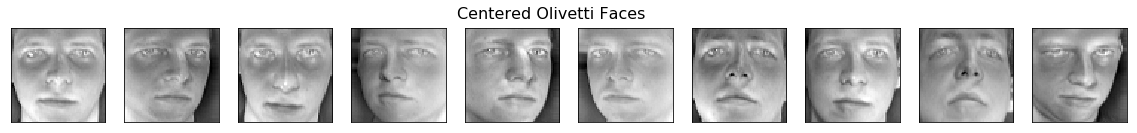

In [4]:
# Use a subsample for training
images_faces_train = images_faces[:350,:,:]
data_faces_train = data_faces[:350,:]

n_samples = len(images_faces_train)
image_shape = images_faces_train[0].shape

# global centering
data_faces_centered = data_faces_train - data_faces_train.mean(axis=0)
# local centering
data_faces_centered -= data_faces_centered.mean(axis=1).reshape(n_samples, -1)

# Let's show some centered faces
plt.figure(figsize=(20, 2))
plt.suptitle("Centered Olivetti Faces", size=16)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(data_faces_centered[i].reshape(image_shape), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

** Learn a dictionary **

In consideration of computational time, we recommend setting the number of dictionaries to 100. For sparse coding problem, the number of dictionaries should be larger than the number of features. You will do an exercise using similar codes for sparse coding.

We use dictionary learning algorithm implemented in scikit-learn:

[sklearn.decomposition.MiniBatchDictionaryLearning()](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.MiniBatchDictionaryLearning.html)

In [5]:
from sklearn.decomposition import MiniBatchDictionaryLearning

time_start = time()
# To do here (5)
faces_dl = MiniBatchDictionaryLearning(n_components=100, alpha=0.1, n_iter=100, random_state=0)
data_faces_code = faces_dl.fit_transform(data_faces_centered)
time_training = (time() - time_start)

print("Training finished in %fs"%time_training)

Training finished in 8.795479s


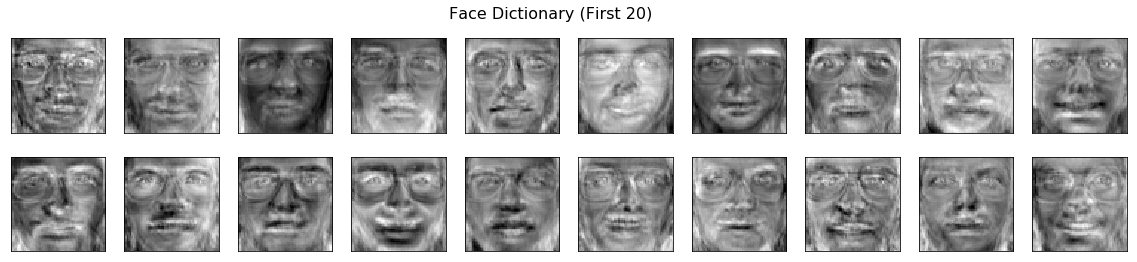

In [6]:
faces_dictionary = faces_dl.components_

plt.figure(figsize=(20, 4))
plt.suptitle("Face Dictionary (First 20)", size=16)
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(faces_dictionary[i].reshape(image_shape), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

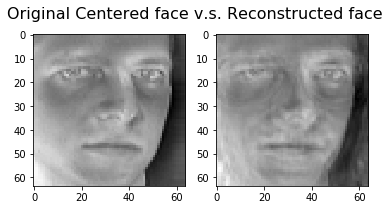

In [7]:
plt.figure(figsize=(6, 3))
plt.suptitle("Original Centered face v.s. Reconstructed face", size=16)
plt.subplot(1, 2, 1)
plt.imshow(data_faces_centered[1].reshape(image_shape), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(data_faces_code[1].dot(faces_dictionary).reshape(image_shape), cmap=plt.cm.gray)

Get the coding on a test image

In [8]:
test_face_centered = data_faces[-1] - data_faces_train.mean(axis=0)
test_face_centered -= test_face_centered.mean()
test_face_centered = test_face_centered.reshape(1,-1)

Sparse coding implemented in scikit-learn:

[sklearn.decomposition.SparseCoder()](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparseCoder.html)

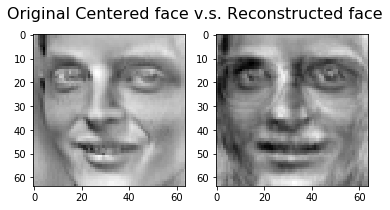

In [9]:
from sklearn.decomposition import SparseCoder

coder = SparseCoder(dictionary=faces_dictionary)
reconstructed_face = coder.transform(test_face_centered)

plt.figure(figsize=(6, 3))
plt.suptitle("Original Centered face v.s. Reconstructed face", size=16)
plt.subplot(1, 2, 1)
plt.imshow(test_face_centered.reshape(image_shape), cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_face.dot(faces_dictionary).reshape(image_shape), cmap=plt.cm.gray)

** Exercise: **

Sparse Coding of image patches

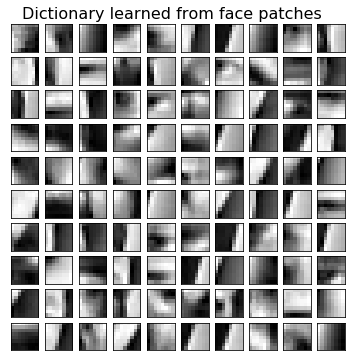

In [10]:
image_face = images_faces[1]

from sklearn.feature_extraction.image import extract_patches_2d

patch_size = (8, 8)
data_patches = extract_patches_2d(image_face, patch_size)
# Here we treat each patch as one example, and the sample is made up of 64 patches here.
# Learn the dictionaries of image patches (Coding should be sparse).
# Compare the difference between dictionaries learned from images and image patches.
# To do here (6)
data_patches = data_patches.reshape(data_patches.shape[0], -1)

# normalization
data_patches_centered = data_patches - data_patches.mean(axis=0)
data_patches_centered /= data_patches_centered.std(axis=0)

# sparce coding
patch_dl = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=500, random_state=0)
patch_dl.fit(data_patches_centered)

patch_dictionary = patch_dl.components_

plt.figure(figsize=(6, 6))
plt.suptitle("Dictionary learned from face patches", size=16, y=0.92)
for i in range(len(patch_dictionary)):
    plt.subplot(10, 10, i+1)
    plt.imshow(patch_dictionary[i].reshape(patch_size), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
# Results are likw below
# You can check whether the coding is sparse

## 4. Matrix Factorization (MF)

We want to solve the following matrix factorization problem:
\begin{equation}
\mathbf{R} \approx \mathbf{P} \times \mathbf{Q}^T = \hat{\mathbf{R}}
\end{equation}
Element in the original matrix is then estimated via
\begin{equation}
\hat{r_{ij}} = p_i^T q_j = \sum_{k=1}^K p_{ik} q_{kj}
\end{equation}
Here let us first consider a gradient descent optimization method:

In an online fashion, we optimize the following reconstruction error with regularization
\begin{equation}
e_{ij}^2 = (r_{ij}-\sum_{k=1}^K p_{ik} q_{kj})^2 + \frac{\beta}{2} \sum_{k=1}^K ({\Vert\mathbf{P}\Vert}^2+{\Vert\mathbf{Q}\Vert}^2)
\end{equation}
The gradient descent update rules are as follows
\begin{equation}
p_{ik}' = p_{ik}+\alpha \frac{\partial}{\partial p_{ik}}e_{ij}^2 = p_{ik}+\alpha(2e_{ij}q_{kj}-\beta p_{ik})
\end{equation}
\begin{equation}
q_{kj}' = q_{kj}+\alpha \frac{\partial}{\partial q_{kj}}e_{ij}^2 = q_{kj}+\alpha(2e_{ij}p_{ik}-\beta q_{kj})
\end{equation}

In [2]:
import numpy as np

** Define a matrix factorization function **

** Input:**

* $\mathbf{R}$: the matrix to be factorized, dimension $N \times M$
* $\mathbf{P}$: an initial matrix of dimension $N \times K$
* $\mathbf{Q}$: an initial matrix of dimension $M \times K$
* $K$: the number of latent features
* steps: the maximum number of steps to perform the optimisation
* alpha: the learning rate
* beta: the regularization parameter

** Output:**
* the final matrices $\mathbf{P}$ and $\mathbf{Q}$

In [3]:
# Code credit: Albert Au Yeung
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2*eij*Q[k][j] - beta*P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2*eij*P[i][k] - beta*Q[k][j])
    return P, Q.T

Enter the matrix we want to factorize:

In [4]:
R = [[5,3,0,1],
     [4,0,0,1],
     [1,1,0,5],
     [1,0,0,4],
     [1,0,5,5]]
# zero entries in the above matrix represent missing values
R = np.array(R)

Test the MF function:

In [5]:
N = len(R)
M = len(R[0])
K = 2

# initialize 
rng = np.random.RandomState(1)
P = rng.rand(N,K)
Q = rng.rand(M,K)

P_estimate, Q_estimate = matrix_factorization(R, P, Q, K)
print('P=\n',P_estimate)
print('Q=\n',Q_estimate)

P=
 [[-0.57374926  2.22204032]
 [-0.38424383  1.80513741]
 [ 1.66705515  1.14560142]
 [ 1.29451249  1.01140908]
 [ 1.66957083  1.18420919]]
Q=
 [[-0.81553352  2.02912328]
 [-0.25698247  1.27353583]
 [ 1.24310229  2.436639  ]
 [ 2.26443633  1.03573431]]


Verify the calculated matrices:

In [6]:
P_estimate.dot(Q_estimate.T)

array([[4.97670551, 2.97729147, 4.70108108, 1.00222472],
       [3.97621007, 2.3976511 , 3.92081382, 0.99954706],
       [0.96502717, 1.0305605 , 4.86373718, 4.96147894],
       [0.99655539, 0.95539868, 4.07365024, 3.97889218],
       [1.04131547, 1.07908239, 4.96093762, 5.00716293]])

** Exercise: **

For non-negtive matrix factorization, try multiplicative update rule:
\begin{equation}
\mathbf{P}_{ij} = \mathbf{P}_{ij} \frac{(\mathbf{R}\mathbf{Q})_{ij}}{(\mathbf{P}\mathbf{Q}^T\mathbf{Q})_{ij}}
\end{equation}
\begin{equation}
\mathbf{Q}^T_{ij} = \mathbf{Q}^T_{ij} \frac{(\mathbf{P}^T\mathbf{R})_{ij}}{(\mathbf{P}^T\mathbf{P}\mathbf{Q}^T)_{ij}}
\end{equation}

In [7]:
def mf_multiplicative_update(R, P, Q, steps=5000):
    # To do here (7)
    Q = Q.T
    for step in range(steps):
        Pu = P*(R.dot(Q.T))/(P.dot(Q).dot(Q.T))
        Qu = Q*(Pu.T.dot(R))/(Pu.T.dot(Pu).dot(Q))
        e_P = np.sqrt(np.sum((Pu-P)**2, axis=(0,1)))/P.size
        e_Q = np.sqrt(np.sum((Qu-Q)**2, axis=(0,1)))/Q.size
        if e_P<0.001 and e_Q<0.001:
            print("step is:",step)
            break
        P = Pu
        Q = Qu
    return P, Q.T

In [8]:
R = [[5,3,2,1],
     [4,2,2,1],
     [1,1,2,5],
     [1,2,2,4],
     [1,2,5,5]]
# zero entries in the above matrix represent missing values
R = np.array(R)

rng = np.random.RandomState(1)
P = rng.rand(N,K)
Q = rng.rand(M,K)

P_estimate, Q_estimate = mf_multiplicative_update(R, P, Q)
print(P_estimate.dot(Q_estimate.T))

step is: 28
[[4.96248923 2.84475032 2.23666932 1.06965708]
 [3.96743719 2.27356538 1.78622146 0.85196987]
 [0.56826659 1.35069871 2.86645959 4.38519347]
 [1.0862295  1.4652766  2.63551479 3.73847136]
 [1.34676563 2.06275595 3.89423934 5.65838072]]


In [9]:
def normalize(samples, maxs = None):
    # Normalize data to [0,1] intervals. Supply the scale factor or
    # compute the maximum value among all the samples.

    if not maxs:
        maxs = np.max(samples)
    return np.array([np.ravel(s) / maxs for s in samples])
def compute_pca(data):
    m = np.mean(data, axis=0)
    datac = np.array([obs - m for obs in data])
    T = np.dot(datac, datac.T)
    [u,s,v] = np.linalg.svd(T)

    # here iteration is over rows but the columns are the eigenvectors of T
    pcs = [np.dot(datac.T, item) for item in u.T ]

    # note that the eigenvectors are not normed after multiplication by T^T
    pcs = np.array([d / np.linalg.norm(d) for d in pcs])

    return pcs, m, s, T, u

In [ ]:
def sigmoid(x, derivative=False):
    if (derivative == True):
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    if (derivative == True):
        for i in range(0, len(x)):
            for k in range(len(x[i])):
                if x[i][k] > 0:
                    x[i][k] = 1
                else:
                    x[i][k] = 0
        return x
    for i in range(0, len(x)):
        for k in range(0, len(x[i])):
            if x[i][k] > 0:
                pass  # do nothing since it would be effectively replacing x with x
            else:
                x[i][k] = 0
    return x

def arctan(x, derivative=False):
    if (derivative == True):
        return (np.cos(x) ** 2)
    return np.arctan(x)